### Data Loading and Manipulating

In [16]:
from pandas import Series
from matplotlib import pyplot as plt 
%matplotlib inline

data = Series.from_csv('../data/daily-total-female-births-in-cal.csv', header=0)
data.head()

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Daily total female births in California, 1959, dtype: int64

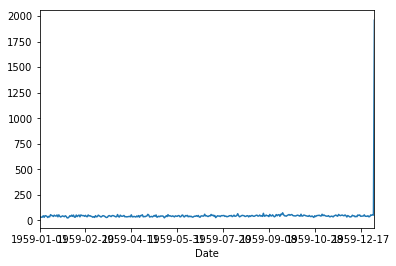

In [17]:
data.plot()

In [20]:
data.max()

1959

In [21]:
data.tail()

Date
1959-12-28                                   52
1959-12-29                                   48
1959-12-30                                   55
1959-12-31                                   50
Daily total female births in California    1959
Name: Daily total female births in California, 1959, dtype: int64

In [22]:
data = data[:-1]

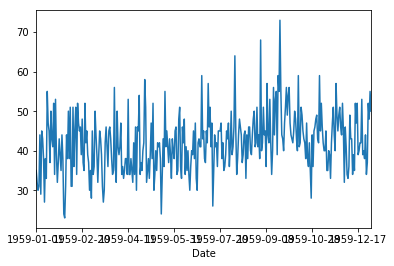

In [23]:
data.plot()

### Generate Moving Average

In [34]:
## Tail rolling average transformation
rolling = data.rolling(window=3)
rolling_mean = rolling.mean()
rolling_mean.head()

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03    32.333333
1959-01-04    31.000000
1959-01-05    35.000000
Name: Daily total female births in California, 1959, dtype: float64

In [36]:
## Overlay rolling average ontop of current dataset
#rolling_mean = rolling_mean[2:]
# Removing NANs offsets plot below

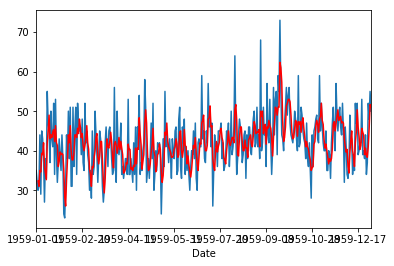

In [35]:
data.plot()
rolling_mean.plot(color='red')

### Moving Average as Feature

The moving average can be used as a source of new information when modeling a time series forecast as a supervised learning problem.

In [39]:
## Convert series to dataframe
import pandas as pd

df = pd.DataFrame(data.values)
width = 3
lag1= df.shift(1)
lag3=df.shift(width-1)
window = lag3.rolling(window=width)
means = window.mean()

df2 = pd.concat([means, lag1, df], axis=1)
df2.columns = ['mean','t-1','t+1']
df2.head()

,mean,t-1,t+1
0,NaN,NaN,35
1,NaN,35.0,32
2,NaN,32.0,30
3,NaN,30.0,31
4,32.333333,31.0,44


### Moving Average as Prediction
Naive model assuming trends and seasonality of time-series have been removed

In [40]:
from numpy import mean
from sklearn.metrics import mean_squared_error

## Prepare learning
X = data.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

In [41]:
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=32.333333, expected=31.000000
predicted=31.000000, expected=44.000000
predicted=35.000000, expected=29.000000
predicted=34.666667, expected=45.000000
predicted=39.333333, expected=43.000000
predicted=39.000000, expected=38.000000
predicted=42.000000, expected=27.000000
predicted=36.000000, expected=38.000000
predicted=34.333333, expected=33.000000
predicted=32.666667, expected=55.000000
predicted=42.000000, expected=47.000000
predicted=45.000000, expected=45.000000
predicted=49.000000, expected=37.000000
predicted=43.000000, expected=50.000000
predicted=44.000000, expected=43.000000
predicted=43.333333, expected=41.000000
predicted=44.666667, expected=52.000000
predicted=45.333333, expected=34.000000
predicted=42.333333, expected=53.000000
predicted=46.333333, expected=39.000000
predicted=42.000000, expected=32.000000
predicted=41.333333, expected=37.000000
predicted=36.000000, expected=43.000000
predicted=37.333333, expected=39.000000
predicted=39.666667, expected=35.000000


In [45]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 61.379


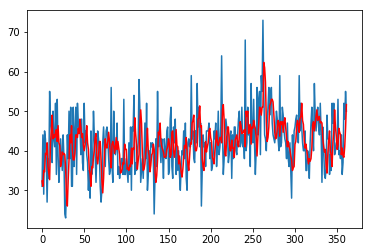

In [43]:
# zoom plot
plt.plot(test)
plt.plot(predictions, color='red')

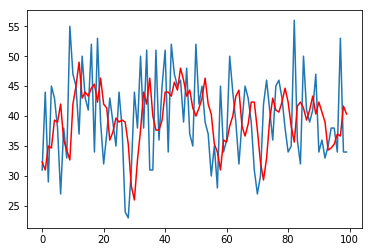

In [44]:
# zoom plot
plt.plot(test[0:100])
plt.plot(predictions[0:100], color='red')